# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | laguna
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | sassandra
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | viana do castelo
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | coxen hole
Processing Record 19 of Set 1 | kos
Processing Record 20 of Set 1 | prescott
Processing Record 21 of Set 1 | gebeit
Processing Record 22 of Set 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

print(city_data_df)


                     City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            punta arenas -53.1500  -70.9167      9.06        57          20   
1             kapuskasing  49.4169  -82.4331      2.10        43          10   
2            invercargill -46.4000  168.3500      7.79        97         100   
3                 college  64.8569 -147.8028    -12.03        75         100   
4               grytviken -54.2811  -36.5092     -0.71        70          84   
..                    ...      ...       ...       ...       ...         ...   
590            mahavelona -17.6848   49.5087     23.27        91          94   
591   minas de matahambre  22.5887  -83.9447     26.81        69         100   
592               kabinda  -6.1333   24.4833     20.98        91          76   
593  vila franca do campo  37.7167  -25.4333     19.23        99          84   
594               lautoka -17.6167  177.4667     23.92        83          20   

     Wind Speed Country        Date  
0

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,9.06,57,20,16.98,CL,1730056022
1,kapuskasing,49.4169,-82.4331,2.10,43,10,3.04,CA,1730056023
2,invercargill,-46.4000,168.3500,7.79,97,100,1.34,NZ,1730056024
3,college,64.8569,-147.8028,-12.03,75,100,0.00,US,1730056025
4,grytviken,-54.2811,-36.5092,-0.71,70,84,2.43,GS,1730056027


In [15]:
import os

# Step 1: Create the 'output_data' directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)  # exist_ok=True prevents errors if the folder already exists

# Step 2: Export the DataFrame to the CSV file inside the created folder
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

print("CSV file saved successfully!")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

CSV file saved successfully!


In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,9.06,57,20,16.98,CL,1730056022
1,kapuskasing,49.4169,-82.4331,2.10,43,10,3.04,CA,1730056023
2,invercargill,-46.4000,168.3500,7.79,97,100,1.34,NZ,1730056024
3,college,64.8569,-147.8028,-12.03,75,100,0.00,US,1730056025
4,grytviken,-54.2811,-36.5092,-0.71,70,84,2.43,GS,1730056027


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

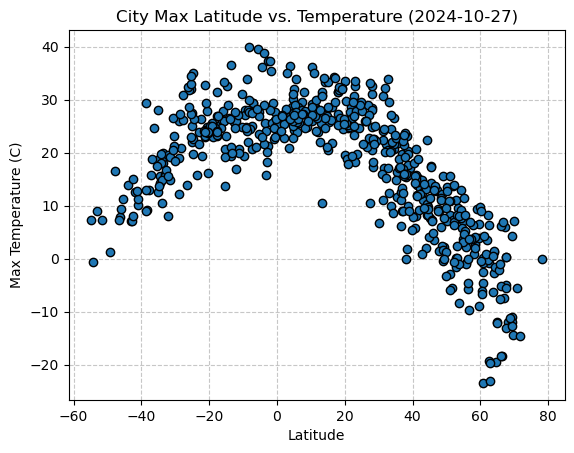

In [17]:
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

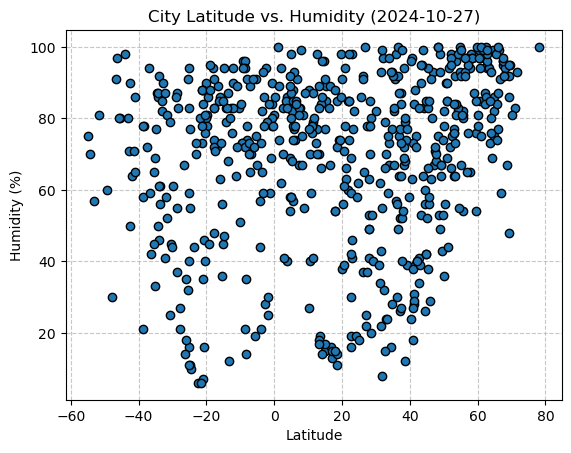

In [18]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

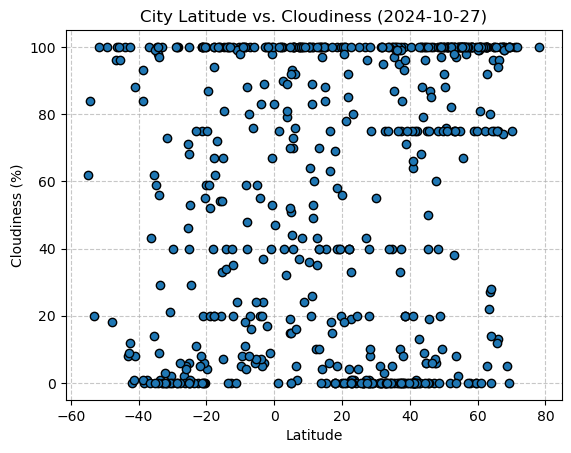

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']


# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

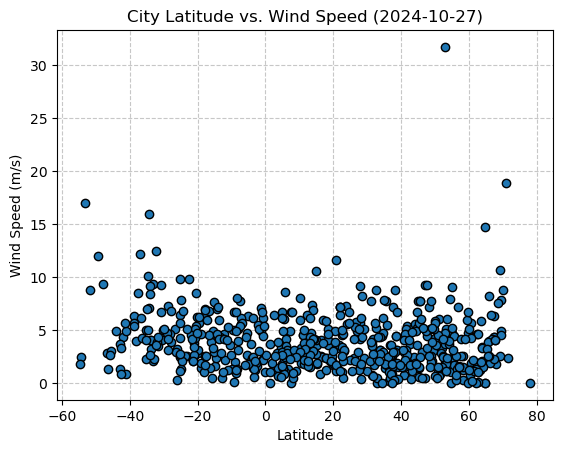

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed ({today})") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Print the regression statistics
    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    # Create regression line values
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    print(line_eq)

    # Create Plot
    plt.scatter(x, y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles} ({today})")
    plt.plot(x, regress_values, "r-", label=line_eq)

    # Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)

    # Dynamic annotation positioning
    plt.annotate(line_eq, (x.mean(), y.mean()), fontsize=15, color="red")

    # Show the legend for the regression line
    plt.legend()

    # Show plot
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapuskasing,49.4169,-82.4331,2.10,43,10,3.04,CA,1730056023
3,college,64.8569,-147.8028,-12.03,75,100,0.00,US,1730056025
5,saipan,15.1355,145.7010,28.39,89,40,3.60,MP,1730056028
6,ilulissat,69.2167,-51.1000,-10.99,48,0,2.57,GL,1730056029
7,petropavlovsk-kamchatsky,53.0452,158.6483,-0.67,64,75,2.00,RU,1730056030


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,9.06,57,20,16.98,CL,1730056022
2,invercargill,-46.4000,168.3500,7.79,97,100,1.34,NZ,1730056024
4,grytviken,-54.2811,-36.5092,-0.71,70,84,2.43,GS,1730056027
9,port-aux-francais,-49.3500,70.2167,1.32,60,100,12.01,TF,1730056033
10,edinburgh of the seven seas,-37.0676,-12.3116,15.70,94,100,12.22,SH,1730056034


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8690161557143613 
p-value  :  1.5956067662512265e-125 
std-error:  0.016148100946428483
y = -0.57x + 35.4


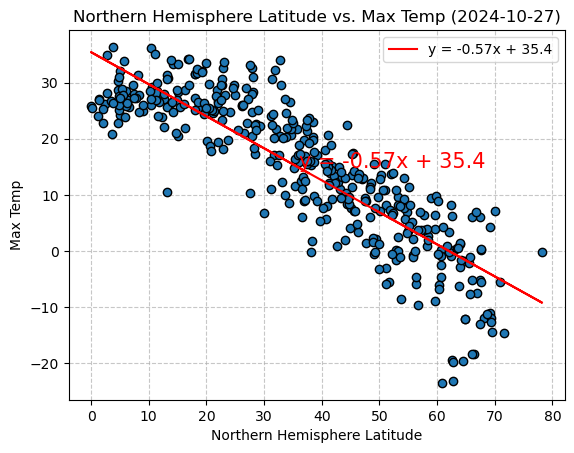

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.6791451424643862 
p-value  :  6.552964318373696e-27 
std-error:  0.029932633852412065
y = 0.38x + 30.54


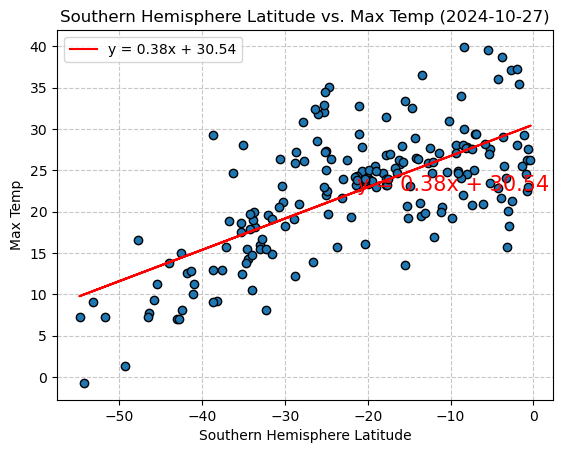

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** Both models above show significant linear relationships between their variables. This can be identified by the small p-values. First, let's discuss their differences. The Northern Hemisphere plot has a strong negative correlation since x increases and y decreases. The Southern Hemisphere plot shows a moderate positive correltation, indicated by the x and y both increasing. This shows us that the Northern and Southern Hemispheres have opposite trends. 

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.23549371533343316 
p-value  :  1.6019202824885482e-06 
std-error:  0.05829400447080873
y = 0.28x + 60.64


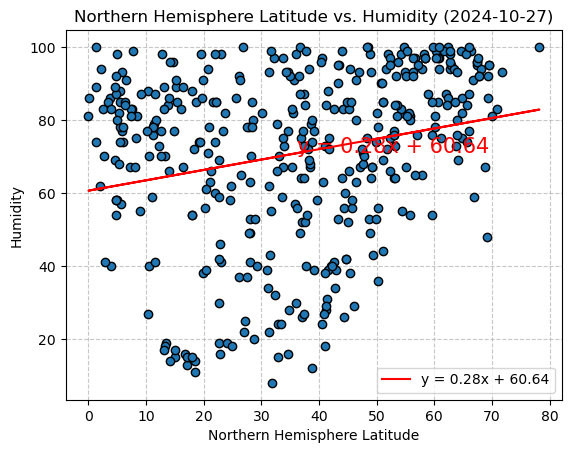

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.057543419782662815 
p-value  :  0.43157747032361415 
std-error:  0.13148964489275536
y = 0.1x + 68.4


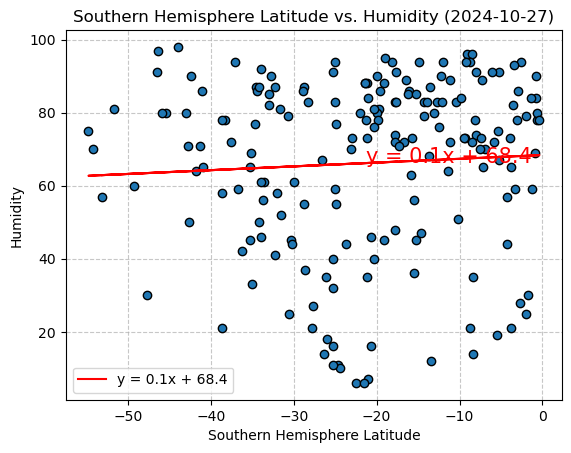

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** Plot 1 indicates a positive relationship between humidity and latitude in the northern hemisphere, however it is a weak relationship. Plot 2 appears to indicated that there is no true correlation between humidity and latitude in the southern hemisphere,

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.18065861759809654 
p-value  :  0.0002531041115476064 
std-error:  0.10478551708603337
y = 0.39x + 44.05


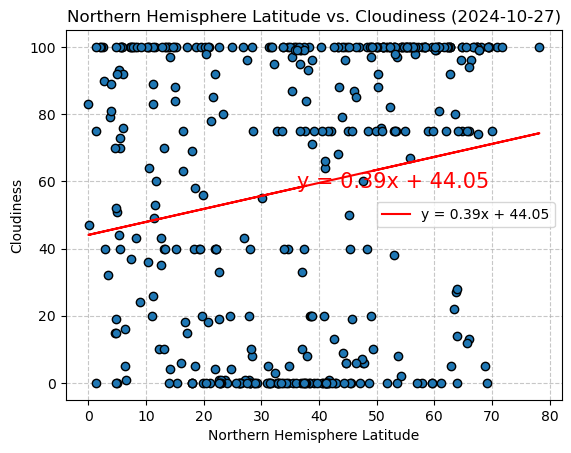

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.0887533508553207 
p-value  :  0.22457190482233935 
std-error:  0.22174447399387062
y = 0.27x + 54.52


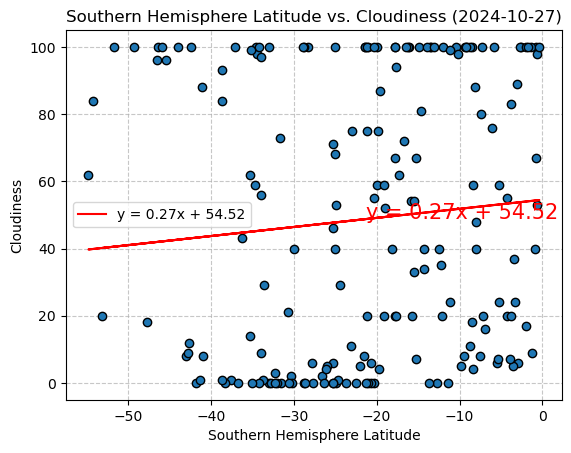

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** plot 1 seems to show us that cloudiness tends to increase with latitude, even though it is minimally within the Northern Hemisphere. Plot 2 suggests that there is not meaningful trend for cloudiness vs latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.05422608074735674 
p-value  :  0.27568730698704164 
std-error:  0.00709972403524755
y = 0.01x + 3.19


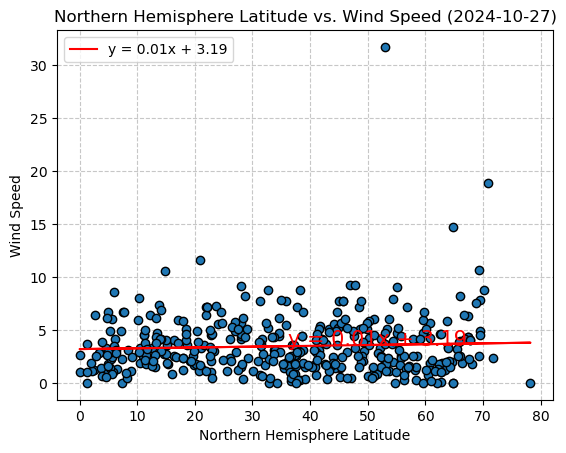

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.2518972830317557 
p-value  :  0.00047123430316238556 
std-error:  0.01451304442768833
y = -0.05x + 3.35


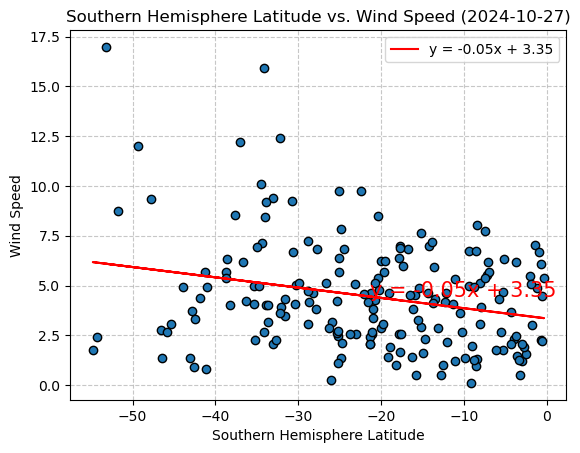

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** Plot 1 seems to indicate that in the Northern Hemisphere there is no meaningful relationship between latitude and wind speed. Plot 2, appears to indicate that wind speed decreases when latitude increases in the southern hemisphere. It is minimal, but it is there. 